# Assignment 7

## Data Analytics 1

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features

1. [Overview](#1.-Overview)
2. [Importing Libraries](#2.-Importing-Libraries)
3. [Data Preprocessing](#3.-Data-Preprocessing)
4. [Data Visualization](#4.-Data-Visualization)
5. [Data Splitting](#5.-Data-Splitting)
6. [Linear Regression Model](#6.-Linear-Regression-Model)

### 1. Overview

Columns:
- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxide concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TRATIO**: Pupil-teacher ratio by town
- **B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- **LSTAT**: Percentage of lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000s



### 2. Importing Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning))

In [2]:
import numpy as np   
import pandas as pd    
from tabulate import tabulate
import matplotlib.pyplot as plt 
from IPython.display import display
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('./HousingData.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


From get-go, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).



Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.


### 3. Data Preprocessing

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

We can see that there are null values in 6 columns, let's fill all of them with the mean values of respective columns

In [6]:
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())

In [7]:
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 4. Data Visualization

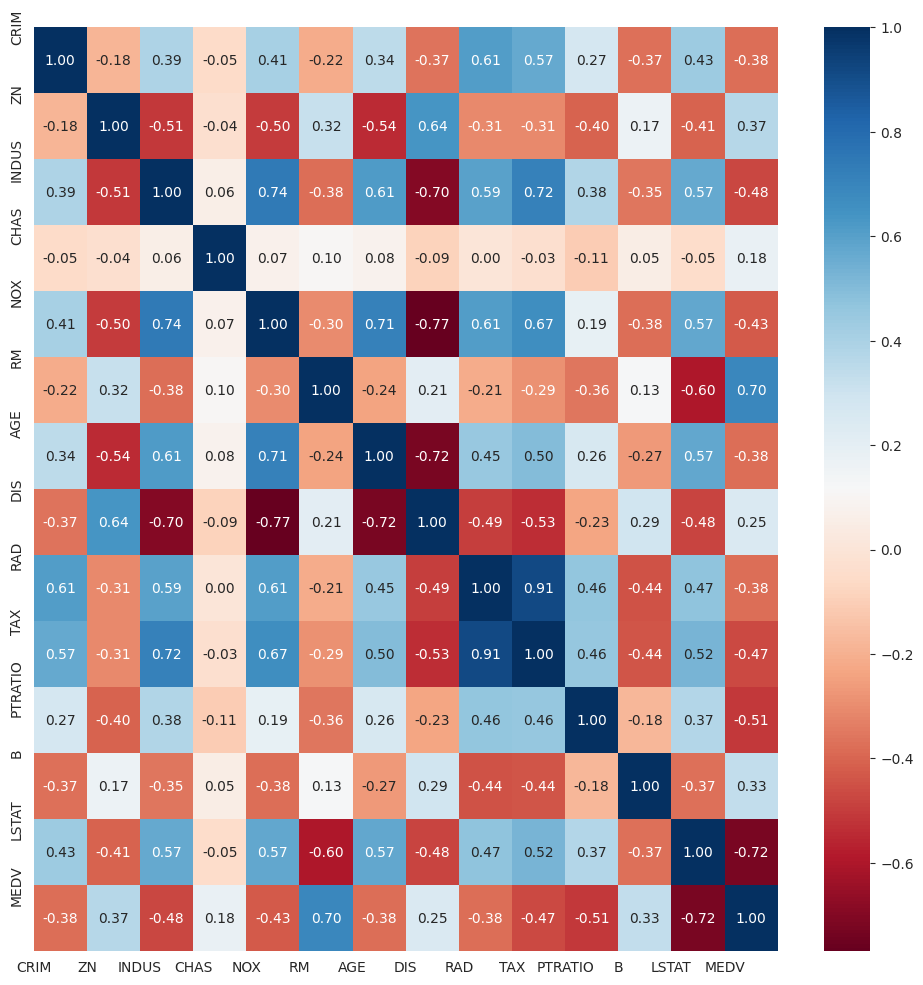

In [9]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(12, 12))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [10]:
# sns.pairplot(df)
# plt.show()

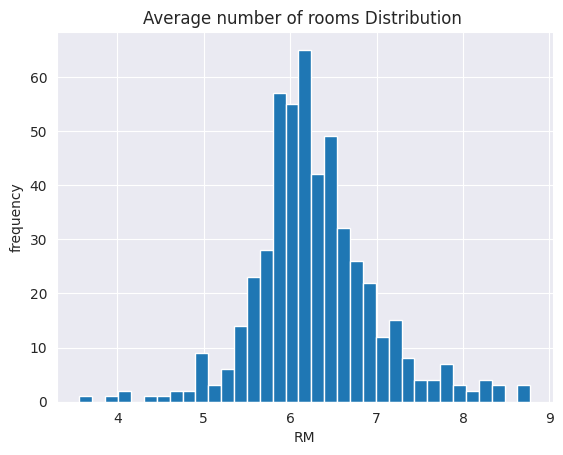

In [11]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['RM'], bins = 35)
plt.title("Average number of rooms Distribution ")
plt.xlabel("RM")
plt.ylabel("frequency")
plt.show()

### 5. Data Splitting

```X = np.asarray(df.drop(["medv"], axis=1))```: This line extracts the values from the DataFrame df for all the columns except the last one and assigns them to the variable X. This creates a NumPy array containing the features (independent variables) for the machine learning model. The iloc method is used for integer-location based indexing.

```y = y = np.asarray(df["medv"])```: This line extracts the values from the 13th column (the one which is to be predicted) of the DataFrame df and assigns them to the variable y. The reshape(-1, 1) part is used to reshape the array into a column vector. This is commonly done to ensure that y is a 2D array (specifically a column vector), which is a requirement for some machine learning algorithms in scikit-learn.

In [12]:
X = np.asarray(df.drop(["medv"], axis=1))
y = np.asarray(df["medv"])

```train_test_split``` is a function from the scikit-learn library in Python that is commonly used to split a dataset into training and testing sets for machine learning. This function helps in evaluating the performance of a machine learning model by training it on one subset of the data and testing it on another independent subset.

### Parameters:

- X: Feature array.
- y: Target array.
- test_size: The proportion of the dataset to include in the test split. For example, test_size=0.2 means that 20% of the data will be used for testing, and 80% for training.
- random_state: An optional parameter to seed the random number generator for reproducibility. Setting a specific random_state ensures that the same split is obtained each time the code is run.

The function returns four sets:

- X_train: Features for the training set.
- X_test: Features for the testing set.
- y_train: Target values for the training set.
- y_test: Target values for the testing set.



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [14]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


### 6. Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score on the Test set results
cv_linear = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = model.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = model.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE (Root Mean Squared Error): ", rmse_linear)

CV:  0.6971800744551642
R2_score (train):  0.7360104431027295
R2_score (test):  0.6980201112613149
RMSE (Root Mean Squared Error):  4.770005965219517
